<a href="https://colab.research.google.com/github/rahul-727/SPR-/blob/main/2348544_Lab6_SPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 6 - Dynamic Time Warping (DTW) to compare and align two numerical sequences (vectors).

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [17]:
# Define the vectors
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

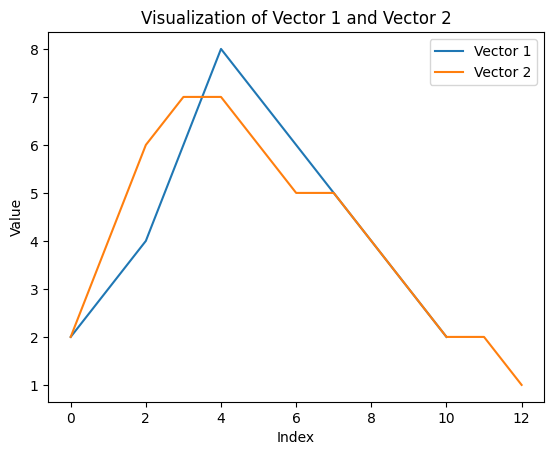

In [18]:
# Plot the vectors
plt.plot(vector1, label="Vector 1")
plt.plot(vector2, label="Vector 2")
plt.legend()
plt.title("Visualization of Vector 1 and Vector 2")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

* From this plot we can see that both vectors have similar overall shape that is both start low rise to a peak and then decrease again
* although shapes are similar there's a slight horizontal difference shift between the two vectors, vector 2 is slighly shifted to right

DTW Implementation

DTW algorithm is used to measure the similarity or alignment between two numerical sequences (or time series).

* The function compares two sequences that is vec 1 and vec2 and finds the best way to match them by stretching or shrinking parts of the sequence, this helps to measure how similar they are even if they are different in lenghth and timing

* First the function creates a matrix where each point tells how much it costs to align value from vec1 with a value from vec2. Cost is just the difference between 2 numbers
* Each cell shows the total cost of aligning the vectors up to that point.
* this function finds the best way to match two sequences, even if one is stretched or shifted.It tells you how similar the sequences are.

In [19]:
def dtw(vector1, vector2):
    n, m = len(vector1), len(vector2)
    cost_matrix = np.zeros((n, m))

    # Compute pairwise distances
    dist_matrix = cdist(vector1.reshape(-1, 1), vector2.reshape(-1, 1), metric='euclidean')

    # Initialize the first cell
    cost_matrix[0, 0] = dist_matrix[0, 0]

    # Fill the first row and first column
    for i in range(1, n):
        cost_matrix[i, 0] = cost_matrix[i-1, 0] + dist_matrix[i, 0]
    for j in range(1, m):
        cost_matrix[0, j] = cost_matrix[0, j-1] + dist_matrix[0, j]

    # Fill the rest of the cost matrix
    for i in range(1, n):
        for j in range(1, m):
            cost_matrix[i, j] = dist_matrix[i, j] + min(
                cost_matrix[i-1, j],      # Insertion
                cost_matrix[i, j-1],      # Deletion
                cost_matrix[i-1, j-1]     # Match
            )

    # Backtracking to find the warping path
    i, j = n - 1, m - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_cost = min(
                cost_matrix[i-1, j],      # Insertion
                cost_matrix[i, j-1],      # Deletion
                cost_matrix[i-1, j-1]     # Match
            )
            if min_cost == cost_matrix[i-1, j-1]:
                i, j = i-1, j-1
            elif min_cost == cost_matrix[i-1, j]:
                i -= 1
            else:
                j -= 1
        path.append((i, j))

    path.reverse()
    return cost_matrix, path

# Calculate DTW
cost_matrix, warping_path = dtw(vector1, vector2)

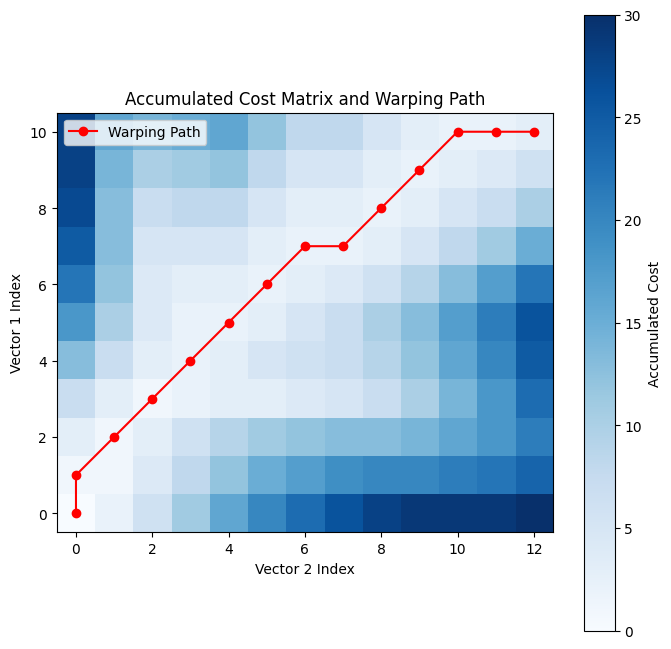

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(cost_matrix, origin='lower', cmap='Blues', interpolation='nearest')
plt.colorbar(label="Accumulated Cost")
path_x, path_y = zip(*warping_path)
plt.plot(path_y, path_x, marker='o', color='red', label="Warping Path")
plt.title("Accumulated Cost Matrix and Warping Path")
plt.xlabel("Vector 2 Index")
plt.ylabel("Vector 1 Index")
plt.legend()
plt.show()

* each cell in matrix represents the cumulative cost of aligning a specific elememt of vec 1 with an element of vec2
* darker shades of blue indicate higheer cost meaning a greter similarity between those elements
* the optimal alignment path which minimizes the total cost is indicated by the warping path
* if it is diagonal it means vectors are well aligned in time, deviations from the diagonal indicate areas where one vector needs to be stretched or compressed to align with the other
* a straight warpinng path suggests higher similarity between the vectors
* More complex paths, with many turns and deviations, imply greater differences in the sequences.
* in our case the plots shows a path thats is fairly close to the diagonal, suggesting a decent degree of similarity between the vectors despite the slight horizontal shift
* the cost is gradually increaing along the path

In [21]:
# Compute DTW distance
dtw_distance = cost_matrix[-1, -1]
print(f"DTW Distance: {dtw_distance}")

DTW Distance: 3.0


The DTW distance provides a measure of similarity between two sequences
* A lower DTW distance means the two sequences are more similar.
* A higher DTW distance means the sequences are less similar.
* If two sequences have a DTW distance of 0, they are identical (or perfectly aligned).
* A DTW distance of 3.0 indicates that he sequences are almost matching